<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/18_Principal_Component_Analysis_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Compreensão visual do processo de PCA com apenas duas dimensões

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set()

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat = df_feat[['mean radius','mean perimeter']]
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df = pd.concat([df_feat, df_target],axis=1)

In [5]:
df.head()

,mean radius,mean perimeter,Cancer
0,17.99,122.80,0
1,20.57,132.90,0
2,19.69,130.00,0
3,11.42,77.58,0
4,20.29,135.10,0


DADOS ORIGINAIS

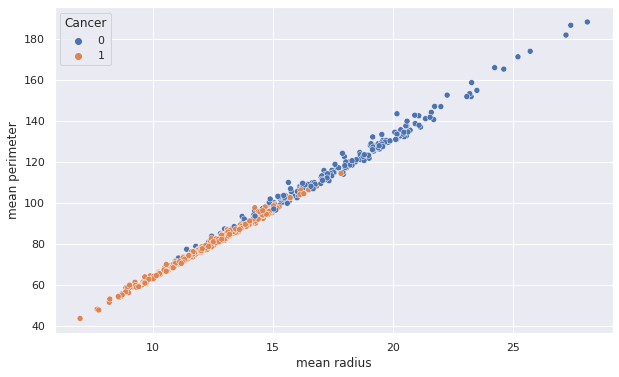

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "mean radius", y = "mean perimeter", hue = "Cancer", data = df)
plt.show()

In [7]:
#verificando a normalização (não faz parte do exercício)
cols = df.drop('Cancer',axis=1).columns
for i in cols:
	sd = np.std(df[i].values)
	me = np.mean(df[i].values)
	print(i + ": Mean is {x:.3f}, standard deviation is {y:.3f}.".format(x=me, y=sd))

mean radius: Mean is 14.127, standard deviation is 3.521.
mean perimeter: Mean is 91.969, standard deviation is 24.278.


In [8]:
from sklearn.preprocessing import StandardScaler
#normalizando
scaler = StandardScaler()
scaler.fit(df.drop('Cancer',axis=1))
scaled_data = scaler.transform(df.drop('Cancer',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_data, columns=df.columns[:-1])
df_feat2 = pd.concat([df_feat, df_target],axis=1)
df_feat2.head()

,mean radius,mean perimeter,Cancer
0,1.097064,1.269934,0
1,1.829821,1.685955,0
2,1.579888,1.566503,0
3,-0.768909,-0.592687,0
4,1.750297,1.776573,0


DADOS NORMALIZADOS

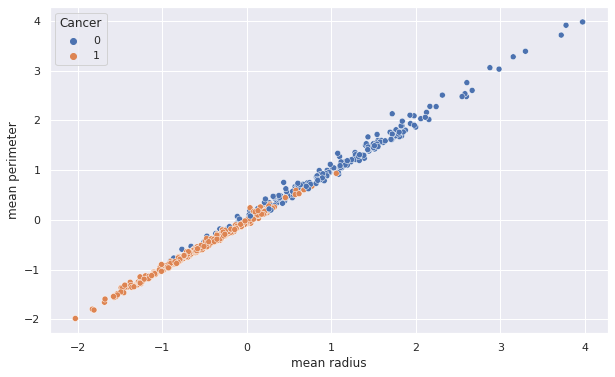

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "mean radius", y = "mean perimeter", hue = "Cancer", data = df_feat2)
plt.show()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_pca = pca.transform(scaled_data)

In [13]:
df_plot = pd.DataFrame({'ft1': x_pca[:,0] ,'ft2': x_pca[:,1] ,'Cancer': cancer['target']})
df_plot.head()

,ft1,ft2,Cancer
0,1.673720,0.122237,0
1,2.486029,-0.101729,0
2,2.224835,-0.009465,0
3,-0.962794,0.124608,0
4,2.493874,0.018580,0


DADOS APOS PCA

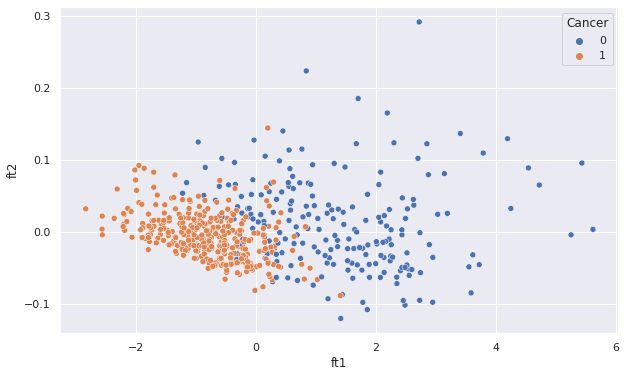

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "ft1", y = "ft2", hue = "Cancer", data = df_plot)
plt.show()